<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2024TeamB/blob/main/EDA_template_teamb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective**: Exploratory Data Analysis (EDA)

Exploratory data analysis is a task performed by data scientists to get familiar with the data. All the initial tasks you do to understand your data well are known as EDA.

There are main components of exploring data:
1. Understanding data/Basic Data Exploration
2. Cleaning dataset
3. Understanding variables
4. Analyzing relationships between variables



# Importing Libraries

In [2]:
## install the newest version,
## uncomment this line in first runtime, it needs to restart runtime
!pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     / 17.8 MB 19.7 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=e680a9b4a8d313d66472cd92da2855f2704e0abed821ab986c335d59066a85c8
  Stored in directory: /tmp/pip-ephem-wheel-cache-w0xn0peq/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wh

In [3]:
import pandas_profiling
#pandas_profiling.version.__version__
#=> 2.9.0

<ipython-input-3-8ff8d8393e52>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
# will make plot outputs appear and stored within the notebook.
%matplotlib inline

In [5]:
from google.colab import drive
# mount drive to access database
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
material_path = "/content/drive/MyDrive/WS2324_Kurs5/Material"

In [7]:
# list of datawarehoses
!ls "/content/drive/MyDrive/WS2324_Kurs5/Material"

source_dbs  SQL_TeamB_Warehouse_V2_20240203.db



# Loading Data


In [8]:
# datawarehouse path
DB_DWH_PATH = f"{material_path}/SQL_TeamB_Warehouse_V2_20240203.db"
# DB_DWH_PATH = "/content/drive/My Drive/synthea_patient_data/DWH_dbs/DWH_lung_cancer.db"

# connect to db
dwh_conn = sqlite3.connect(DB_DWH_PATH)

In [9]:
# list of tables in db
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('F_BreastCancerQoL',), ('d_Patients',), ('d_Medications',), ('d_Cancertherapy',), ('d_Comorbidity',)]


In [10]:
# Read sqlite query results into a pandas DataFrame
# patient data
df_patients = pd.read_sql_query("SELECT * FROM d_patients", dwh_conn)
# Cancer therapy data
df_cancertherapy = pd.read_sql_query("SELECT * FROM d_cancertherapy", dwh_conn)
# Comorbidity data
df_comorbidity = pd.read_sql_query("SELECT * FROM d_comorbidity", dwh_conn)
# Medications data
df_medication = pd.read_sql_query("SELECT * FROM d_medications", dwh_conn)
# Cancer therapy data
df_breastcancer_qol = pd.read_sql_query("SELECT * FROM f_breastcancerqol", dwh_conn)

In [11]:
# MERGE TWO DATASETS
df1 = pd.merge(df_patients, df_breastcancer_qol, left_on="Id", right_on="PatientId", how="inner")
df1 = df1.drop(["Id"], axis=1)
df1.head(21)

,AGE_Studyinclusion,AGE_diagnosis,Maritalstatus,PatientId,Age_group_diagnosis_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last
0,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,199224,0,1,NaN,0,1.0,0.8
1,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,1601380,0,1,NaN,0,1.0,0.8
2,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,1732186,1,0,NaN,0,1.0,0.8
3,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,1734919,1,0,NaN,0,1.0,0.8
4,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,2119714,0,1,NaN,0,1.0,0.8
5,72,59,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1,49436004.0,1,hispanic,F,583214,1,0,197604.0,1,1.0,0.7
6,72,59,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1,49436004.0,1,hispanic,F,583214,1,0,855332.0,1,1.0,0.7
7,72,59,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1,49436004.0,1,hispanic,F,583214,1,0,897718.0,1,1.0,0.7
8,72,59,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1,230690007.0,1,hispanic,F,583214,1,0,197604.0,1,1.0,0.7
9,72,59,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1,230690007.0,1,hispanic,F,583214,1,0,855332.0,1,1.0,0.7


In [70]:
df2 = pd.merge(df1, df_cancertherapy, left_on="Cancertherapy_ID", right_on="ID", how="inner")
df2 = df2.drop(["ID"], axis=1)
df2.rename(columns={"Description": "Description_Cancertherapy"}, inplace=True)
df2.head(21)


,AGE_Studyinclusion,AGE_diagnosis,Maritalstatus,PatientId,Age_group_diagnosis_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last,Description_Cancertherapy,Chemotherapy,TargetedTherapy
0,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,199224,0,1,NaN,0,1.0,0.8,Anastrozole (AI),0,1
1,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,1601380,0,1,NaN,0,1.0,0.8,Palbociclib (CDK4/6 inhibitor),0,1
2,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,1732186,1,0,NaN,0,1.0,0.8,Epirubicin,1,0
3,75,46,M,90db0662-2d8a-72d2-6da6-340189352ed5,1,NaN,0,nonhispanic,F,1732186,1,0,NaN,0,NaN,NaN,Epirubicin,1,0
4,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,1734919,1,0,NaN,0,1.0,0.8,Cyclophosphamide,1,0
5,51,39,M,8417ea73-2556-9bc3-817e-964762bda4ae,1,NaN,0,nonhispanic,F,2119714,0,1,NaN,0,1.0,0.8,Trastuzumab (anti-HER2 antibody),0,1
6,72,59,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1,49436004.0,1,hispanic,F,583214,1,0,197604.0,1,1.0,0.7,Paclitaxel,1,0
7,72,59,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1,49436004.0,1,hispanic,F,583214,1,0,855332.0,1,1.0,0.7,Paclitaxel,1,0
8,72,59,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1,49436004.0,1,hispanic,F,583214,1,0,897718.0,1,1.0,0.7,Paclitaxel,1,0
9,72,59,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1,230690007.0,1,hispanic,F,583214,1,0,197604.0,1,1.0,0.7,Paclitaxel,1,0


In [75]:
df3 = pd.merge(df2, df_comorbidity, left_on="Comorbidity_ID", right_on="ID", how="outer")
df3 = df3.drop(["ID"], axis=1)
df3.rename(columns={"Description": "Description_Cancertherapy"}, inplace=True)
df3.head(21)


,AGE_Studyinclusion,AGE_diagnosis,Maritalstatus,PatientId,Age_group_diagnosis_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last,Description_Cancertherapy,Chemotherapy,TargetedTherapy,Description_Cancertherapy
0,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,199224.0,0.0,1.0,NaN,0.0,1.0,0.8,Anastrozole (AI),0.0,1.0,NaN
1,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,1601380.0,0.0,1.0,NaN,0.0,1.0,0.8,Palbociclib (CDK4/6 inhibitor),0.0,1.0,NaN
2,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,1732186.0,1.0,0.0,NaN,0.0,1.0,0.8,Epirubicin,1.0,0.0,NaN
3,75.0,46.0,M,90db0662-2d8a-72d2-6da6-340189352ed5,1.0,NaN,0.0,nonhispanic,F,1732186.0,1.0,0.0,NaN,0.0,NaN,NaN,Epirubicin,1.0,0.0,NaN
4,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,1734919.0,1.0,0.0,NaN,0.0,1.0,0.8,Cyclophosphamide,1.0,0.0,NaN
5,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,2119714.0,0.0,1.0,NaN,0.0,1.0,0.8,Trastuzumab (anti-HER2 antibody),0.0,1.0,NaN
6,75.0,46.0,M,90db0662-2d8a-72d2-6da6-340189352ed5,1.0,NaN,0.0,nonhispanic,F,198240.0,0.0,1.0,NaN,0.0,NaN,NaN,Tamoxifen (SERM),0.0,1.0,NaN
7,73.0,61.0,M,bbd3db10-bbdb-8d43-61aa-ad2dab78459a,1.0,NaN,0.0,nonhispanic,M,198240.0,0.0,1.0,NaN,0.0,1.0,0.9,Tamoxifen (SERM),0.0,1.0,NaN
8,75.0,46.0,M,90db0662-2d8a-72d2-6da6-340189352ed5,1.0,NaN,0.0,nonhispanic,F,1946840.0,0.0,1.0,NaN,0.0,NaN,NaN,Abemaciclib (CDK4/6 inhibitor),0.0,1.0,NaN
9,72.0,59.0,M,d42d555a-8825-38af-e8c3-1b7f503730e9,1.0,49436004.0,1.0,hispanic,F,583214.0,1.0,0.0,197604.0,1.0,1.0,0.7,Paclitaxel,1.0,0.0,Atrial Fibrillation


In [84]:
df = pd.merge(df3, df_medication, left_on="Medication_ID", right_on="ID", how="outer")
df = df.drop(["ID"], axis=1)
df.dropna(subset=["PatientId"], inplace=True)
df.rename(columns={"Description": "Description_Medication"}, inplace=True)
df.head()


,AGE_Studyinclusion,AGE_diagnosis,Maritalstatus,PatientId,Age_group_diagnosis_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,...,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last,Description_Cancertherapy,Chemotherapy,TargetedTherapy,Description_Cancertherapy,Description_Medication
0,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,199224.0,...,1.0,NaN,0.0,1.0,0.8,Anastrozole (AI),0.0,1.0,NaN,NaN
1,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,1601380.0,...,1.0,NaN,0.0,1.0,0.8,Palbociclib (CDK4/6 inhibitor),0.0,1.0,NaN,NaN
2,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,1732186.0,...,0.0,NaN,0.0,1.0,0.8,Epirubicin,1.0,0.0,NaN,NaN
3,75.0,46.0,M,90db0662-2d8a-72d2-6da6-340189352ed5,1.0,NaN,0.0,nonhispanic,F,1732186.0,...,0.0,NaN,0.0,NaN,NaN,Epirubicin,1.0,0.0,NaN,NaN
4,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,1734919.0,...,0.0,NaN,0.0,1.0,0.8,Cyclophosphamide,1.0,0.0,NaN,NaN


In [85]:
#close db connection
dwh_conn.close()

# Understanding Data/Basic Data Exploration
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

* head of the dataset
* the shape of the dataset
* info of the dataset
* summary of the dataset
* (n)unique values for each variable

In [115]:
# Anonymisierung der PatientId (Zuordnung einer laufenden Nummer beginnend mit 1)
unique_ids = df['PatientId'].unique()
anonymized_ids = range(1, len(unique_ids) + 1)
id_map = dict(zip(unique_ids, anonymized_ids))

# Anwenden des Mappings auf die ID-Spalte
df['PatientId'] = df['PatientId'].map(id_map)


In [117]:
df.head(21)

,AGE_Studyinclusion,AGE_diagnosis,Maritalstatus,PatientId,Age_group_diagnosis_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last,Chemotherapy,TargetedTherapy,Description_Medication
0,51.0,39.0,M,1,1.0,NaN,0.0,nonhispanic,F,199224.0,0.0,1.0,NaN,0.0,1.0,0.8,0.0,1.0,NaN
1,51.0,39.0,M,1,1.0,NaN,0.0,nonhispanic,F,1601380.0,0.0,1.0,NaN,0.0,1.0,0.8,0.0,1.0,NaN
2,51.0,39.0,M,1,1.0,NaN,0.0,nonhispanic,F,1732186.0,1.0,0.0,NaN,0.0,1.0,0.8,1.0,0.0,NaN
3,75.0,46.0,M,2,1.0,NaN,0.0,nonhispanic,F,1732186.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN
4,51.0,39.0,M,1,1.0,NaN,0.0,nonhispanic,F,1734919.0,1.0,0.0,NaN,0.0,1.0,0.8,1.0,0.0,NaN
5,51.0,39.0,M,1,1.0,NaN,0.0,nonhispanic,F,2119714.0,0.0,1.0,NaN,0.0,1.0,0.8,0.0,1.0,NaN
6,75.0,46.0,M,2,1.0,NaN,0.0,nonhispanic,F,198240.0,0.0,1.0,NaN,0.0,NaN,NaN,0.0,1.0,NaN
7,73.0,61.0,M,3,1.0,NaN,0.0,nonhispanic,M,198240.0,0.0,1.0,NaN,0.0,1.0,0.9,0.0,1.0,NaN
8,75.0,46.0,M,2,1.0,NaN,0.0,nonhispanic,F,1946840.0,0.0,1.0,NaN,0.0,NaN,NaN,0.0,1.0,NaN
14,72.0,59.0,M,4,1.0,49436004.0,1.0,hispanic,F,583214.0,1.0,0.0,197604.0,1.0,1.0,0.7,1.0,0.0,Digoxin


In [86]:
# .head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.
df.head()

,AGE_Studyinclusion,AGE_diagnosis,Maritalstatus,PatientId,Age_group_diagnosis_ID,Comorbidity_ID,Comorbidity_YesNo,Ethnicity,Gender,Cancertherapy_ID,...,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last,Description_Cancertherapy,Chemotherapy,TargetedTherapy,Description_Cancertherapy,Description_Medication
0,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,199224.0,...,1.0,NaN,0.0,1.0,0.8,Anastrozole (AI),0.0,1.0,NaN,NaN
1,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,1601380.0,...,1.0,NaN,0.0,1.0,0.8,Palbociclib (CDK4/6 inhibitor),0.0,1.0,NaN,NaN
2,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,1732186.0,...,0.0,NaN,0.0,1.0,0.8,Epirubicin,1.0,0.0,NaN,NaN
3,75.0,46.0,M,90db0662-2d8a-72d2-6da6-340189352ed5,1.0,NaN,0.0,nonhispanic,F,1732186.0,...,0.0,NaN,0.0,NaN,NaN,Epirubicin,1.0,0.0,NaN,NaN
4,51.0,39.0,M,8417ea73-2556-9bc3-817e-964762bda4ae,1.0,NaN,0.0,nonhispanic,F,1734919.0,...,0.0,NaN,0.0,1.0,0.8,Cyclophosphamide,1.0,0.0,NaN,NaN


In [87]:
# .shape returns the number of rows by the number of columns
#size of dataset
df.shape

(21, 21)

In [88]:
# .columns returns the name of all of your columns in the dataset.
df.columns

Index(['AGE_Studyinclusion', 'AGE_diagnosis', 'Maritalstatus', 'PatientId',
       'Age_group_diagnosis_ID', 'Comorbidity_ID', 'Comorbidity_YesNo',
       'Ethnicity', 'Gender', 'Cancertherapy_ID', 'Chemotherapy_YesNo',
       'Targetedtherapy_YesNo', 'Medication_ID', 'Medication_YesNo',
       'QoL_Value_first', 'QoL_Value_last', 'Description_Cancertherapy',
       'Chemotherapy', 'TargetedTherapy', 'Description_Cancertherapy',
       'Description_Medication'],
      dtype='object')

In [89]:
# attribute type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 25
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE_Studyinclusion         21 non-null     float64
 1   AGE_diagnosis              21 non-null     float64
 2   Maritalstatus              21 non-null     object 
 3   PatientId                  21 non-null     object 
 4   Age_group_diagnosis_ID     21 non-null     float64
 5   Comorbidity_ID             12 non-null     float64
 6   Comorbidity_YesNo          21 non-null     float64
 7   Ethnicity                  21 non-null     object 
 8   Gender                     21 non-null     object 
 9   Cancertherapy_ID           21 non-null     float64
 10  Chemotherapy_YesNo         21 non-null     float64
 11  Targetedtherapy_YesNo      21 non-null     float64
 12  Medication_ID              12 non-null     float64
 13  Medication_YesNo           21 non-null     float64
 

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [90]:
# .describe summarizes the count, mean, standard deviation, min, and max for numerical variables.
df.describe()

,AGE_Studyinclusion,AGE_diagnosis,Age_group_diagnosis_ID,Comorbidity_ID,Comorbidity_YesNo,Cancertherapy_ID,Chemotherapy_YesNo,Targetedtherapy_YesNo,Medication_ID,Medication_YesNo,QoL_Value_first,QoL_Value_last,Chemotherapy,TargetedTherapy
count,21.000000,21.000000,21.0,1.200000e+01,21.000000,2.100000e+01,21.000000,21.000000,12.000000,21.000000,18.000000,18.000000,21.000000,21.000000
mean,66.333333,51.047619,1.0,9.474950e+07,0.571429,8.241226e+05,0.571429,0.428571,650218.000000,0.571429,0.933333,0.738889,0.571429,0.428571
std,9.095787,8.163799,0.0,8.197521e+07,0.507093,6.668345e+05,0.507093,0.507093,334765.826426,0.507093,0.097014,0.060768,0.507093,0.507093
min,51.000000,39.000000,1.0,4.943600e+07,0.000000,1.982400e+05,0.000000,0.000000,197604.000000,0.000000,0.800000,0.700000,0.000000,0.000000
25%,68.000000,46.000000,1.0,4.943600e+07,0.000000,1.992240e+05,0.000000,0.000000,197604.000000,0.000000,0.800000,0.700000,0.000000,0.000000
50%,68.000000,54.000000,1.0,4.943600e+07,1.000000,5.832140e+05,1.000000,0.000000,855332.000000,1.000000,1.000000,0.700000,1.000000,0.000000
75%,72.000000,59.000000,1.0,9.474950e+07,1.000000,1.601380e+06,1.000000,1.000000,897718.000000,1.000000,1.000000,0.800000,1.000000,1.000000
max,75.000000,61.000000,1.0,2.306900e+08,1.000000,2.119714e+06,1.000000,1.000000,897718.000000,1.000000,1.000000,0.900000,1.000000,1.000000


In [91]:
# .nunique(axis=0) returns the number of unique values for each variable.
df.nunique(axis=0)


AGE_Studyinclusion           5
AGE_diagnosis                5
Maritalstatus                1
PatientId                    5
Age_group_diagnosis_ID       1
Comorbidity_ID               2
Comorbidity_YesNo            2
Ethnicity                    2
Gender                       2
Cancertherapy_ID             8
Chemotherapy_YesNo           2
Targetedtherapy_YesNo        2
Medication_ID                3
Medication_YesNo             2
QoL_Value_first              2
QoL_Value_last               3
Description_Cancertherapy    8
Chemotherapy                 2
TargetedTherapy              2
Description_Cancertherapy    2
Description_Medication       3
dtype: int64

In [92]:
# replacing blank values (with space) with NAN
df = df.replace(r'^\s*$', np.nan, regex=True)


In [95]:
df['Description_Cancertherapy'].ndim
df = df.drop(['Description_Cancertherapy'], axis=1)


In [96]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#  Cleaning Dataset


### Removing Duplicate Rows


In [97]:
print("Number of Duplicated Rows", df.duplicated(df.columns).sum())

Number of Duplicated Rows 0


In [26]:
#
# dropping duplicate values if exists and keep first one
#df.drop_duplicates(keep="first",inplace=True)
#print("Size of dataset after removinf duplicated rows", df.shape)


### Removing Redundant and Unnecessary Variables

In [98]:
df.columns

Index(['AGE_Studyinclusion', 'AGE_diagnosis', 'Maritalstatus', 'PatientId',
       'Age_group_diagnosis_ID', 'Comorbidity_ID', 'Comorbidity_YesNo',
       'Ethnicity', 'Gender', 'Cancertherapy_ID', 'Chemotherapy_YesNo',
       'Targetedtherapy_YesNo', 'Medication_ID', 'Medication_YesNo',
       'QoL_Value_first', 'QoL_Value_last', 'Chemotherapy', 'TargetedTherapy',
       'Description_Medication'],
      dtype='object')

In [28]:
#df = df.drop(['SSN', 'PREFIX', 'ZIP', 'DRIVERS', 'PASSPORT', 'FIRST',
       #       'LAST', 'BIRTHPLACE', 'ADDRESS', 'STATE', 'COUNTRY',
        #      'PATIENT', 'ENCOUNTER'], axis=1)

### Handling Missing Value

We can see that we have various missing values in the respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

* Drop the missing values: In this case, we drop the missing values from those variables. In case there are very few missing values you can drop those values.
* Impute with mean value: For the numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn’t have extreme values .i.e. outliers.
* Impute with median value: For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.
* Impute with mode value: For the categorical column, you can replace the missing values with mode values i.e the frequent ones.

In [99]:
df.shape

(21, 19)

In [100]:
# percentage of not null values in each column
df.count()/len(df) * 100

AGE_Studyinclusion        100.000000
AGE_diagnosis             100.000000
Maritalstatus             100.000000
PatientId                 100.000000
Age_group_diagnosis_ID    100.000000
Comorbidity_ID             57.142857
Comorbidity_YesNo         100.000000
Ethnicity                 100.000000
Gender                    100.000000
Cancertherapy_ID          100.000000
Chemotherapy_YesNo        100.000000
Targetedtherapy_YesNo     100.000000
Medication_ID              57.142857
Medication_YesNo          100.000000
QoL_Value_first            85.714286
QoL_Value_last             85.714286
Chemotherapy              100.000000
TargetedTherapy           100.000000
Description_Medication     57.142857
dtype: float64

In [101]:
# number of null values in each column
df.isnull().sum()

AGE_Studyinclusion        0
AGE_diagnosis             0
Maritalstatus             0
PatientId                 0
Age_group_diagnosis_ID    0
Comorbidity_ID            9
Comorbidity_YesNo         0
Ethnicity                 0
Gender                    0
Cancertherapy_ID          0
Chemotherapy_YesNo        0
Targetedtherapy_YesNo     0
Medication_ID             9
Medication_YesNo          0
QoL_Value_first           3
QoL_Value_last            3
Chemotherapy              0
TargetedTherapy           0
Description_Medication    9
dtype: int64

In [32]:
# delete sparc columns
#df.drop(['SUFFIX', 'MAIDEN'], axis=1, inplace=True)

In [33]:
# fill nall values with todays date
#df["DEATHDATE"] = df.DEATHDATE.fillna(pd.to_datetime("today"))
#df["STOP"] = df.STOP.fillna(pd.to_datetime("today"))

In [34]:
# fill nall values with mode
#df['MARITAL'].fillna(df['MARITAL'].mode()[0], inplace=True)

In [35]:
# convert to date
#df["DEATHDATE"] = pd.to_datetime(df["DEATHDATE"])
#df["BIRTHDATE"] = pd.to_datetime(df["BIRTHDATE"])
#df["START"] = pd.to_datetime(df["START"])
#df["STOP"] = pd.to_datetime(df["STOP"])

In [36]:
# calculate age
#df["AGE"] = df.DEATHDATE.dt.year - df.BIRTHDATE.dt.year
# df["DURATION_day"] = (df.STOP.dt.year - df.START.dt.year) * 12 + (df.STOP.dt.month - df.START.dt.month)
#df["DURATION"] = df.STOP.dt.to_period("M").astype(int) - df.START.dt.to_period("M").astype(int)

#df.DURATION

In [102]:
# number of null values in each column
df.isnull().sum()

AGE_Studyinclusion        0
AGE_diagnosis             0
Maritalstatus             0
PatientId                 0
Age_group_diagnosis_ID    0
Comorbidity_ID            9
Comorbidity_YesNo         0
Ethnicity                 0
Gender                    0
Cancertherapy_ID          0
Chemotherapy_YesNo        0
Targetedtherapy_YesNo     0
Medication_ID             9
Medication_YesNo          0
QoL_Value_first           3
QoL_Value_last            3
Chemotherapy              0
TargetedTherapy           0
Description_Medication    9
dtype: int64

# Univariate Analysis

## Grouping

In [103]:
# number of patients in procedure table
df.groupby(["PatientId"]).size()

PatientId
8417ea73-2556-9bc3-817e-964762bda4ae    5
90db0662-2d8a-72d2-6da6-340189352ed5    3
bbd3db10-bbdb-8d43-61aa-ad2dab78459a    1
d42d555a-8825-38af-e8c3-1b7f503730e9    6
d72aeff7-23b0-ada3-3816-c526929756af    6
dtype: int64

There are info for 21 patients in table.



In [104]:
df.groupby(["Medication_ID"]).size()

Medication_ID
197604.0    4
855332.0    4
897718.0    4
dtype: int64

For some patients, there are more than one diagnose.

## Histogram

if you only wanted to explore a single variable by itself? This is when histograms come into play.


<Axes: ylabel='Frequency'>

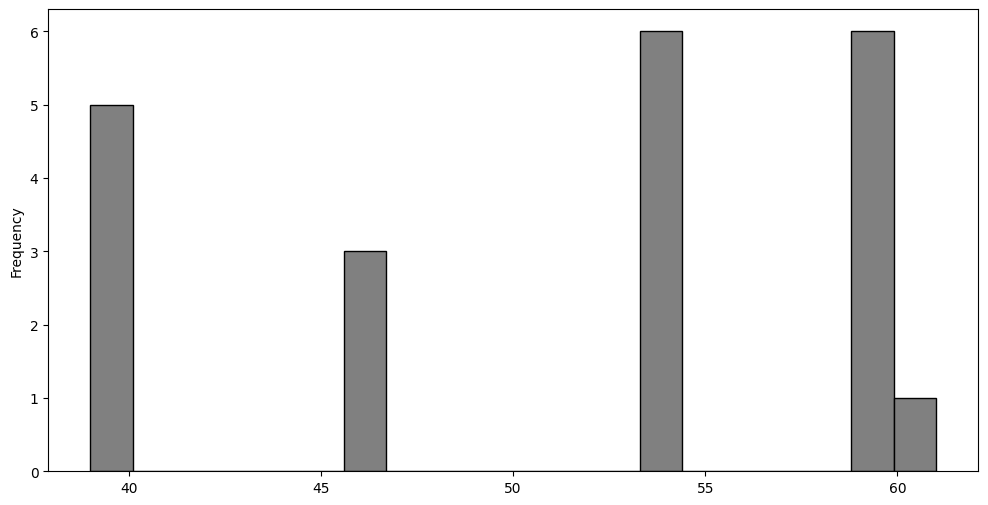

In [105]:
df['AGE_diagnosis'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

In [41]:
# # binning age column and remove age attribute
#bins = [i for i in range(df.AGE_diagnosis.min(), df.AGE_diagnosis.max(), 5)]
#df['AGE_BINS'] = pd.cut(x=df['AGE_diagnosis'], bins=bins)

#df.drop(["AGE_diagnosis"], axis=1, inplace=True)


## Boxplot and Removing Outlier

We can discover outliers with visualization tools:
* Box plot
* Scatter plot
* Z-Score
* IQR Score

For example:

<Axes: xlabel='AGE_diagnosis'>

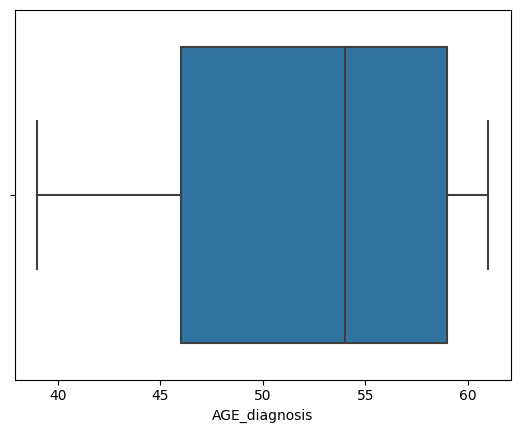

In [106]:
sns.boxplot(x=df["AGE_diagnosis"])

In [107]:
df = df[df["AGE_diagnosis"]<1200]
df.shape

(21, 19)

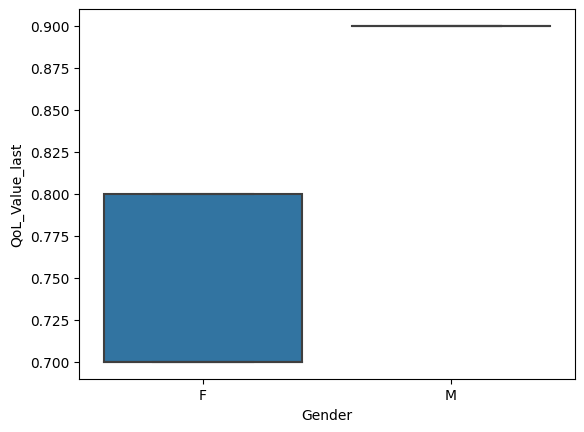

In [114]:
# Erstellen eines Boxplots
sns.boxplot(x=df['Gender'], y=df['QoL_Value_last'])

# Anzeigen des Plots
plt.show()


## Countplot

In [44]:
## distribution of GENDER attribute
#sns.countplot(x="variable", hue= "value", data=pd.melt(df[["GENDER"]]))

In [45]:
## distribution of Marital attribute
#sns.countplot(x="variable", hue= "value", data=pd.melt(df[["MARITAL"]]))

In [46]:
## distribution of RACE attribute
#sns.countplot(x="variable", hue= "value", data=pd.melt(df[["RACE"]]))

In [47]:
## distribution of RACE attribute
#sns.countplot(x="variable", hue= "value", data=pd.melt(df[["ETHNICITY"]]))

In [48]:
## convert categorical variable to numerical by replacing
#df.GENDER.replace(['M', 'F'], [0, 1], inplace=True)
#df.MARITAL.replace(['M', 'S'], [0, 1], inplace=True)
#df.RACE.replace(["white", "black", "asian"], [1, 2, 3], inplace=True)
#df.ETHNICITY.replace(["nonhispanic", "hispanic"], [0, 1], inplace=True)

#  Multivariate Analysis: Analyzing Relationships Between Variables

Correlation matrices and scatterplots are useful for exploring the relationship between two variables.


### Correlation Matrix


In [108]:
# list of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 25
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE_Studyinclusion      21 non-null     float64
 1   AGE_diagnosis           21 non-null     float64
 2   Maritalstatus           21 non-null     object 
 3   PatientId               21 non-null     object 
 4   Age_group_diagnosis_ID  21 non-null     float64
 5   Comorbidity_ID          12 non-null     float64
 6   Comorbidity_YesNo       21 non-null     float64
 7   Ethnicity               21 non-null     object 
 8   Gender                  21 non-null     object 
 9   Cancertherapy_ID        21 non-null     float64
 10  Chemotherapy_YesNo      21 non-null     float64
 11  Targetedtherapy_YesNo   21 non-null     float64
 12  Medication_ID           12 non-null     float64
 13  Medication_YesNo        21 non-null     float64
 14  QoL_Value_first         18 non-null     floa

<ipython-input-109-a000bd33eab6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

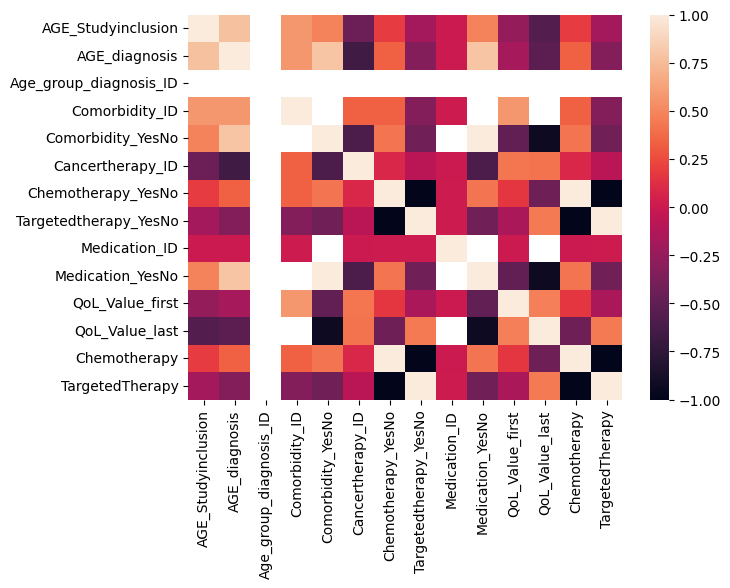

In [109]:
# Generating the correlating matrix
corr = df.corr()

plt.figure(figsize=(7, 5))
# Generating the correlation heat-map
sns.heatmap(corr, annot=False)

In [51]:
# df subset contains numerical variables
numdf = df.select_dtypes(include=np.number)
# df subset contains categorical variables
catdf = df.select_dtypes(exclude=np.number)
numdf.shape, catdf.shape

((12, 14), (12, 7))

In [52]:
# select feature with correlation less than a threshold
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False

selected_columns = numdf.columns[columns]
selected_columns

Index(['AGE_Studyinclusion', 'Age_group_diagnosis_ID', 'Comorbidity_ID',
       'Comorbidity_YesNo', 'Cancertherapy_ID', 'Targetedtherapy_YesNo',
       'Medication_ID', 'Medication_YesNo', 'QoL_Value_last'],
      dtype='object')

* It is obvious correlation between GENDER and SCT_CODE_PROCEDURE < correlation between SCT_CODE_PROCEDURE and AGE.

*   AGE and GENDER are correlated.



### Scatterplot


In [54]:
#df = df[(df["AGE"]<100)]

<Axes: xlabel='QoL_Value_first', ylabel='QoL_Value_last'>

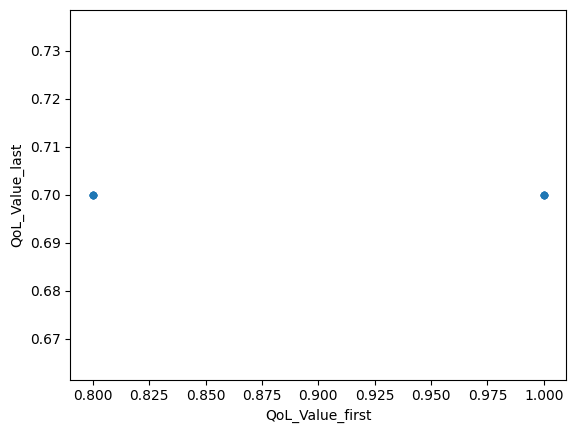

In [55]:
df.plot(kind='scatter', y='QoL_Value_last', x='QoL_Value_first')


<Axes: xlabel='AGE_diagnosis', ylabel='QoL_Value_first'>

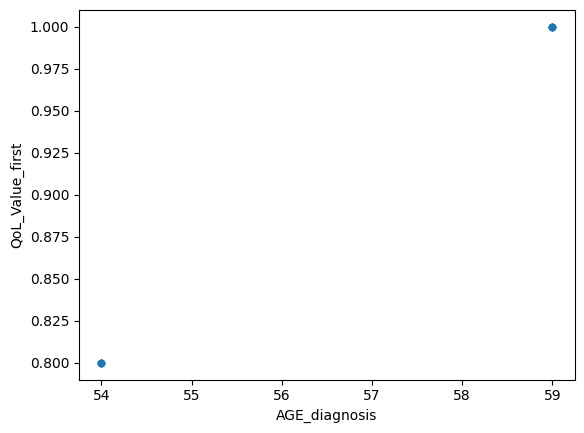

In [56]:
df.plot(kind='scatter', y='QoL_Value_first', x='AGE_diagnosis')


In [57]:
#df.plot(kind='scatter', y='AGE_diagnosis', x='QoL_Value_last')


In [58]:
#df.plot(kind='scatter', y='HEALTHCARE_EXPENSES', x='RACE')


In [59]:
#df.plot(kind='scatter', x='MARITAL', y='AGE')


In [60]:
#df.plot(kind='scatter', x='HEALTHCARE_EXPENSES', y='GENDER')


In [61]:
# sns.pairplot(df_selected)

### PCA
Principal components are the key to PCA; It is used on two use-case:
* Data visualization
* Speeding machine learning algorithms

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)

In [62]:
## select some columns
#df_selected = df[[ "MARITAL", "RACE", "ETHNICITY", "GENDER", "AGE", 'DURATION', 'CODE', "HEALTHCARE_EXPENSES", 'HEALTHCARE_COVERAGE']]

In [63]:
#from sklearn.preprocessing import StandardScaler


#features = ['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'AGE', 'DURATION', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']
## # Separating out the features
#x = df_selected.loc[:, features].values
## # Separating out the target
#y = df_selected.loc[:,['CODE']].values
## # Standardizing the features
#x = StandardScaler().fit_transform(x)

In [64]:
## check normalization
#x.shape, np.mean(x), np.std(x)

In [65]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])

In [66]:
#finalDf = pd.concat([principalDf, df_selected[['CODE']]], axis = 1)
#finalDf.head()

In [67]:
#print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


From the above output, you can observe that the principal component 1 holds 31.6% of the information while the principal component 2 holds only 18% of the information. Also, the other point to note is that while projecting  data to a two-dimensional data, 50% information was lost.

In [68]:
#df_selected.CODE

In [69]:
'''
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['MARITAL', 'RACE', 'ETHNICITY''GENDER', 'AGE']
targets = [19169002,162864005, 197927001, 10509002, 444814009]
colors = ['r', 'g', 'b', 'g', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CODE'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
'''

"\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1)\nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nax.set_title('2 component PCA', fontsize = 20)\ntargets = ['MARITAL', 'RACE', 'ETHNICITY''GENDER', 'AGE']\ntargets = [19169002,162864005, 197927001, 10509002, 444814009]\ncolors = ['r', 'g', 'b', 'g', 'c']\nfor target, color in zip(targets,colors):\n    indicesToKeep = finalDf['CODE'] == target\n    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']\n               , finalDf.loc[indicesToKeep, 'principal component 2']\n               , c = color\n               , s = 50)\nax.legend(targets)\nax.grid()\n"

# Links
https://chrisalbon.com/python/basics/strings_to_datetime/

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

 EDA:

 https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

 https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

 https://www.analyticssteps.com/blogs/how-do-exploratory-data-analysis-building-machine-learning-models


 https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/


 PCA

 https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60